In [32]:
import glob
import open3d as o3d
import matplotlib.pyplot as plt
from depth_capture.intrinsics import Intrinsics
import numpy as np
import os

In [33]:
depth_path = glob.glob(os.path.join("koen_mri_room", "test5_rgbd", "depth", "*.png"))[0]
filename = depth_path.split("\\")[-1]

rgb_path = os.path.join("koen_mri_room", "test5_rgbd", "rgb", filename)

depth_path, rgb_path

('koen_mri_room\\test5_rgbd\\depth\\frame_0_1710934108.115723.png',
 'koen_mri_room\\test5_rgbd\\rgb\\frame_0_1710934108.115723.png')

In [34]:
color_raw = o3d.io.read_image(rgb_path)
depth_raw = o3d.io.read_image(depth_path)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)

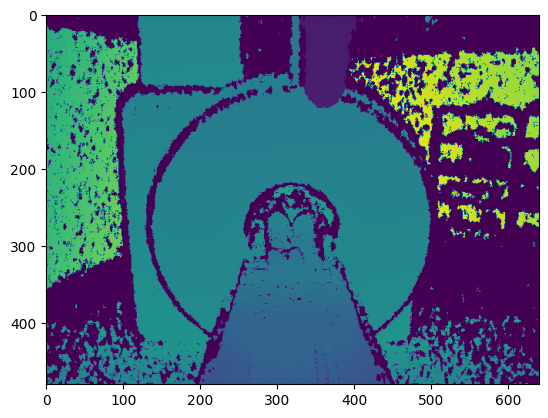

In [36]:
plt.imshow(np.asarray(depth_raw))
plt.show()

In [26]:
intr = Intrinsics(640, 480)

In [29]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, intrinsic=intr.get_intrinsics())

pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

PointCloud with 6676 points.

In [31]:
o3d.visualization.draw_geometries([pcd])